In [135]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


In [136]:
df = pd.read_excel('text.xlsx')

In [137]:
df

,Text_files,Image_files,Mythological label,Tree Label,Animal Label,Content
0,p01_01.txt,s01_01.jpg,1,0,1,"Hail Durga, Ma Tara, destroyer of sorrows.\nIn..."
1,p01_02.txt,s01_02.jpg,1,1,0,"One day, the goddess Durga bestowed her grace\..."
2,p01_03.txt,s01_03.jpg,1,0,0,"Shouting “Hail Durga,” Srimonto boarded the bo..."
3,p01_04.txt,s01_04.jpg,0,0,0,"Finally, the boat docked at Ratnamala quay to ..."
4,p01_05.txt,s01_05.jpg,0,0,0,The king Shalbahon was seated on a jewelled th...
...,...,...,...,...,...,...
101,p13_04.txt,s13_04.jpg,0,1,1,How beautiful the deer looked as it danced in ...
102,p13_05.txt,s13_05.jpg,1,1,0,The (dying) deer then began to cry out loud \n...
103,p13_06.txt,s13_06.jpg,0,1,0,"From under the shade of a banyan tree, Ravana ..."
104,p13_07.txt,s13_07.jpg,1,0,1,And disgorged the chariot he had swallowed.\nW...


In [138]:
aa

'Hail Durga, Ma Tara, destroyer of sorrows.\nInvincible as the strong southern winds, she is Nagendranandini (daughter of the king of mountains).\nAs Ma Chandi, her ten arms stretch in ten directions.\nHer third eye shines brightly in the middle of her forehead.\nLakshmi, with Saraswati on her left, Kartik and Ganesh\nAlong with the lion, the Asura, Joya and Bijoya accompany the Mother. \n'

In [139]:
contents = []
for file_name in df.Text_files:
    with open(file_name, 'r') as file:
        contents.append(file.read())

In [140]:
df['Content'] = contents

In [141]:
df

,Text_files,Image_files,Mythological label,Tree Label,Animal Label,Content
0,p01_01.txt,s01_01.jpg,1,0,1,"Hail Durga, Ma Tara, destroyer of sorrows.\nIn..."
1,p01_02.txt,s01_02.jpg,1,1,0,"One day, the goddess Durga bestowed her grace\..."
2,p01_03.txt,s01_03.jpg,1,0,0,"Shouting “Hail Durga,” Srimonto boarded the bo..."
3,p01_04.txt,s01_04.jpg,0,0,0,"Finally, the boat docked at Ratnamala quay to ..."
4,p01_05.txt,s01_05.jpg,0,0,0,The king Shalbahon was seated on a jewelled th...
...,...,...,...,...,...,...
101,p13_04.txt,s13_04.jpg,0,1,1,How beautiful the deer looked as it danced in ...
102,p13_05.txt,s13_05.jpg,1,1,0,The (dying) deer then began to cry out loud \n...
103,p13_06.txt,s13_06.jpg,0,1,0,"From under the shade of a banyan tree, Ravana ..."
104,p13_07.txt,s13_07.jpg,1,0,1,And disgorged the chariot he had swallowed.\nW...


In [142]:
df.to_excel('text.xlsx', index= False)

In [143]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

text= df.Content.tolist()

In [144]:
count = CountVectorizer()
word_count=count.fit_transform(text)
print(word_count.shape)
print(word_count)

(106, 1621)
  (0, 630)	1
  (0, 432)	1
  (0, 847)	2
  (0, 1382)	1
  (0, 375)	1
  (0, 965)	4
  (0, 1315)	1
  (0, 727)	1
  (0, 73)	2
  (0, 1402)	6
  (0, 1354)	1
  (0, 1318)	1
  (0, 1570)	1
  (0, 1243)	1
  (0, 730)	1
  (0, 925)	1
  (0, 350)	1
  (0, 774)	1
  (0, 916)	1
  (0, 252)	1
  (0, 666)	4
  (0, 1391)	2
  (0, 66)	1
  (0, 1350)	1
  (0, 717)	2
  :	:
  (105, 139)	1
  (105, 1379)	1
  (105, 1275)	4
  (105, 1103)	1
  (105, 834)	1
  (105, 436)	1
  (105, 1097)	2
  (105, 1096)	3
  (105, 1392)	1
  (105, 578)	1
  (105, 1386)	1
  (105, 914)	1
  (105, 1598)	1
  (105, 1128)	1
  (105, 579)	1
  (105, 1089)	1
  (105, 4)	1
  (105, 372)	1
  (105, 619)	1
  (105, 1263)	1
  (105, 78)	1
  (105, 253)	1
  (105, 1399)	1
  (105, 1276)	1
  (105, 999)	1


In [145]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count)
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=count.get_feature_names(),columns=["idf_weights"])

In [146]:
df_idf.sort_values(by=['idf_weights'])

,idf_weights
the,1.038100
and,1.253988
of,1.290802
to,1.329023
in,1.355341
...,...
looks,4.979682
love,4.979682
madhusudan,4.979682
layers,4.979682


In [147]:
#tfidf
tf_idf_vector=tfidf_transformer.transform(word_count)
feature_names = count.get_feature_names()

In [148]:
first_document_vector=tf_idf_vector[1]
df_tfifd= pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df_tfifd.sort_values(by=["tfidf"],ascending=False)


,tfidf
khullona,0.313386
the,0.209560
durga,0.188215
kalketu,0.184678
pomegranate,0.184678
...,...
forms,0.000000
form,0.000000
forget,0.000000
forever,0.000000


In [149]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import nltk
import re
import string
from nltk.stem import WordNetLemmatizer

In [150]:
# train_csv = 
train_csv = df[['Content', 'Mythological label']].sample(frac=0.7)

In [151]:
test_csv = df[['Content', 'Mythological label']].loc[[idx for idx in df.index if idx not in train_csv.index]]

In [152]:
test_csv.reset_index(drop= True, inplace= True)
train_csv.reset_index(drop= True, inplace= True)

In [153]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


KeyboardInterrupt: 

In [154]:
#stopword removal and lemmatization
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()



In [155]:
train_csv.head()


,Content,Mythological label
0,(Responds Radha:) “Let Nanda Ghosh (Krishna’s ...,0
1,And disgorged the chariot he had swallowed.\nW...,1
2,"“You are such a handsome boatman, (but) your b...",0
3,“There is only one I dread - let him not retur...,1
4,"Hail the vanquisher of poison—Manasa, the grac...",1


In [156]:
train_X_non = train_csv['Content']   # 'Content' refers to the review text
train_y = train_csv['Mythological label']   # 'Mythological label' corresponds to Label (1 - positive and 0 - negative)
test_X_non = test_csv['Content']
test_y = test_csv['Mythological label']
train_X=[]
test_X=[]

In [157]:
#text pre processing
for i in range(0, len(train_X_non)):
    review = re.sub('[^a-zA-Z]', ' ', train_X_non[i])
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords)]
    review = ' '.join(review)
    train_X.append(review)

In [158]:
for i in range(0, len(test_X_non)):
    review = re.sub('[^a-zA-Z]', ' ', test_X_non[i])
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords)]
    review = ' '.join(review)
    test_X.append(review)

In [159]:
tf_idf = TfidfVectorizer()
#applying tf idf to training data
X_train_tf = tf_idf.fit_transform(train_X)
#applying tf idf to training data
X_train_tf = tf_idf.transform(train_X)
X_test_tf = tf_idf.transform(test_X)

In [160]:
print(train_csv.iloc[0,0])

(Responds Radha:) “Let Nanda Ghosh (Krishna’s adoptive father) come here and I shall fix you.
“The cows of your shed shall be sold and I shall humble you.”



In [161]:
train_X[0]

'responds radha let nanda ghosh krishna adoptive father come shall fix cow shed shall sold shall humble'

In [162]:
from sklearn.linear_model import LinearRegression

In [163]:
mdl = LinearRegression()

In [164]:
y_train = train_csv['Mythological label'].values
y_test = test_csv['Mythological label'].values

In [165]:
mdl.fit(X_train_tf, train_y)

LinearRegression()

In [166]:
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

In [167]:
predictions = mdl.predict(X_test_tf)

In [168]:
predictions.round(2)

array([ 0.27,  0.41,  0.17,  1.34,  0.91,  0.44,  0.93, -0.09,  0.1 ,
        0.  ,  0.05,  0.33, -0.26, -0.09,  0.03, -0.04,  0.98,  0.41,
        0.67, -0.09,  0.22,  0.07,  0.16, -0.07,  1.37, -0.08,  1.99,
        1.78,  0.41,  0.79, -0.26,  0.64])

In [169]:
y_test

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0])

In [182]:
r2_score(predictions, y_test)

-0.22931034283794727

In [171]:
mean_squared_error(y_test, predictions)

0.400721173936641

In [172]:
# Predictions_train = np.clip(mdl.predict(X_test_tf).round(),0,1)
Predictions_clipped = np.clip(mdl.predict(X_test_tf).round(),0,1)

In [173]:
accuracy = accuracy_score(Predictions_clipped, test_y)
accuracy

0.625

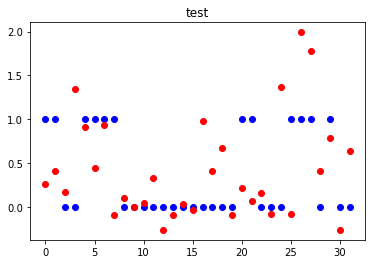

In [179]:
import matplotlib.pyplot as plt
import numpy as np


def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()
    return

plotGraph(y_test, predictions, "test")

In [177]:
Predictions_clipped

array([0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1.])

In [178]:
y_test

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0])